# K-means Clustering


K-means clustering is an unsupervised machine learning technique typically used to group data by searching for patterns and structures within the dataset.

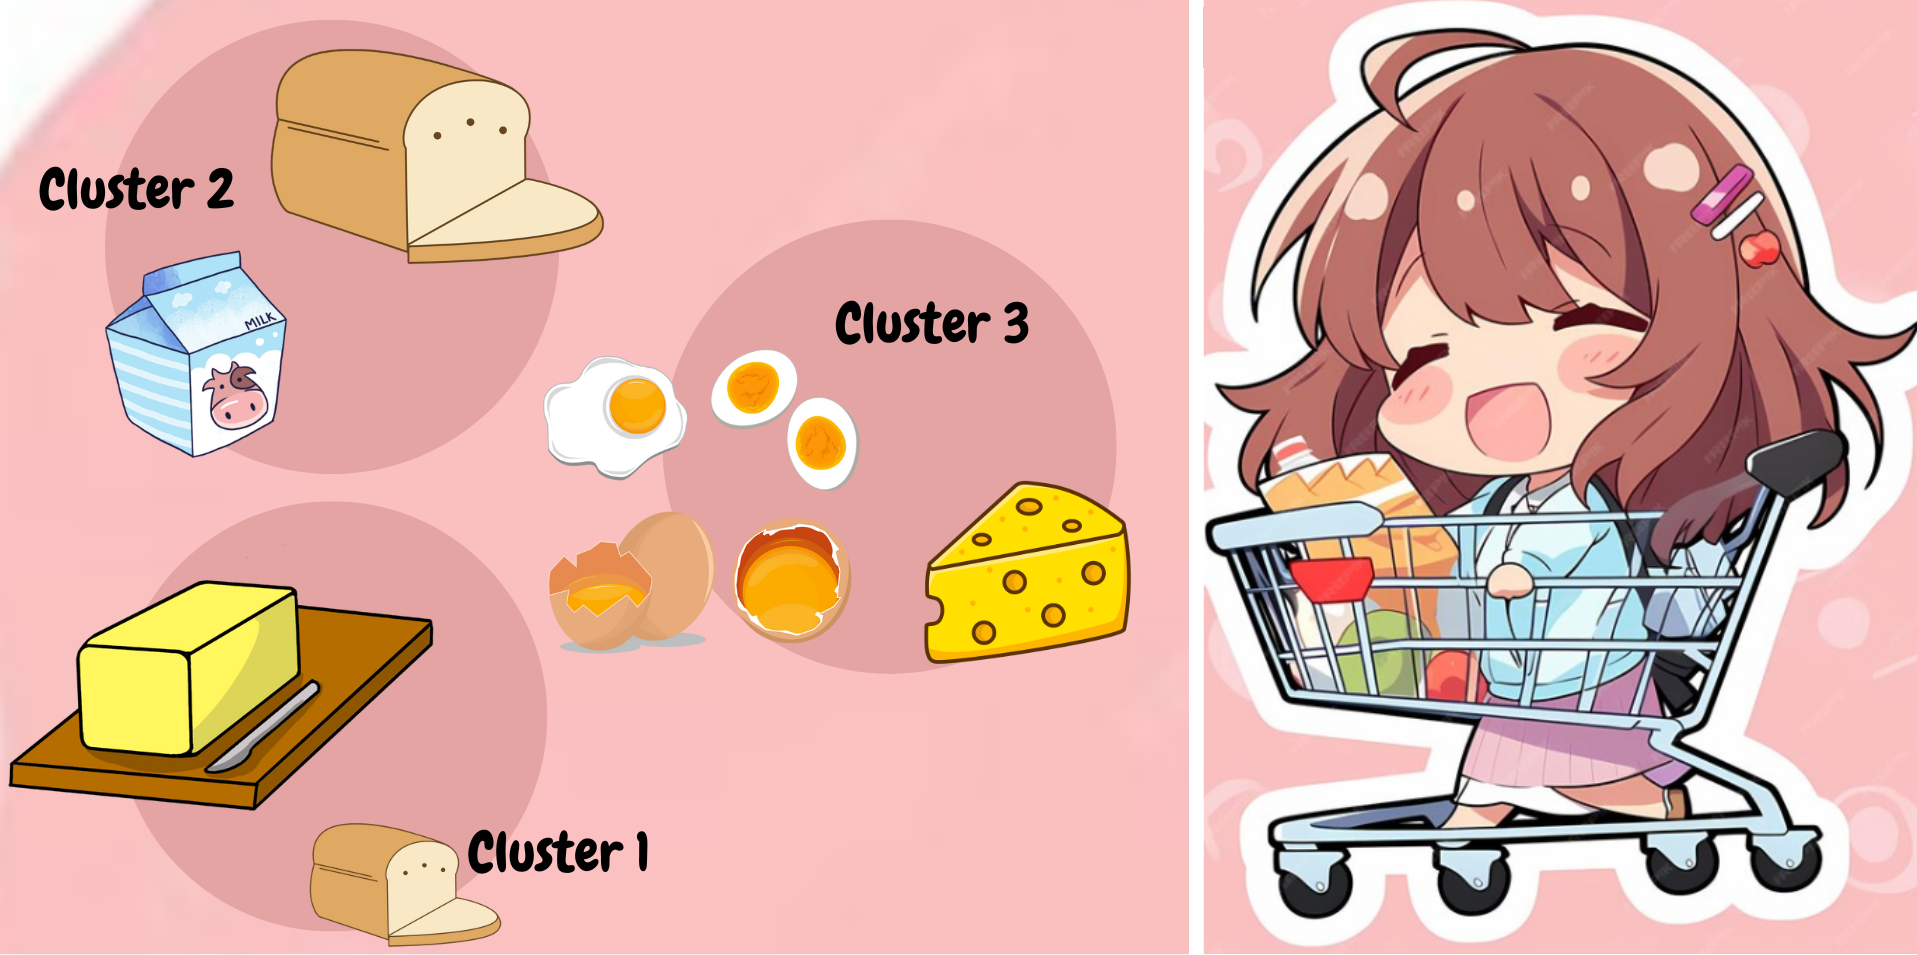

In this article, we will explore K-means clustering, including real-life applications and some of its drawbacks. The mathematical computations behind K-means will not be covered.

**Common applications:**
1. Market Segmentation
2. Document Clustering
3. Sales Analysis
4. Customer Behavior Analysis
5. Transport Planning
and etc....

>**Note:** I will use a custom-made dataset to easily visualize and interpret the results. In real-life scenarios, datasets are more complex and contain outliers and noise. However, always remember to perform data cleaning and Exploratory Data Analysis (EDA) before feeding any dataset into a machine learning model. Additionally, always review the assumptions, pros, and cons of the machine learning model. To keep this article brief, I will not include those steps here; you can find detailed references online.

In [8]:
# Market Purchase Report dataset
import pandas as pd
import numpy as np

# Read the csv data as a DataFrame
df = pd.read_csv('Purchase_Report.csv')

print(df.shape)
df.head(10) 

(9, 6)


,Transaction_ID,Milk,Bread,Butter,Cheese,Eggs
0,1,10,5,0,0,0
1,2,10,6,0,0,0
2,3,10,7,0,0,0
3,4,0,8,111,0,0
4,5,0,9,12,0,0
5,6,0,10,13,0,0
6,7,0,0,0,5,10
7,8,0,0,0,10,20
8,9,0,0,0,15,30


In this dataset, I intentionally included an outlier in transaction number 3. This demonstrates how sensitive this model is to outliers and how they can significantly impact our ability to determine the optimal k in our analysis.

In [9]:
# Drop transaction ID, This column has no meaning in our analysis
df.drop(columns=['Transaction_ID'], inplace=True)

In [10]:
# Normalize the data
# our features must be in the same scale though not specied what UOM if best to do it here.

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df) # it becomes numpy array
# df_scaled[:5]  #show first 5 transactions

Text(0, 0.5, 'inertia')

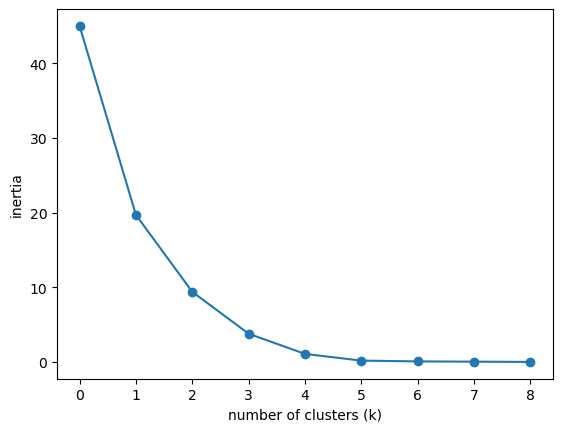

In [11]:
# find the best k using elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clusters = []
inertias = []

# try for 9 k
for k in range(1,10):
  km = KMeans(n_clusters=k, random_state=0)
  km.fit(df_scaled)
  
  # append clusters and inertias
  inertias.append(km.inertia_)
  clusters.append(km)
  
plt.plot(range(len(inertias)), inertias, '-o')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')

The optimal k values should be around 3, 4, and 5. Let’s also check the silhouette score.

In [12]:
# scores per  k using silhoutte score 
from sklearn.metrics import silhouette_score

for i in range(1,8,1): 
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(df_scaled, clusters[i].predict(df_scaled)))

---------------------------------------
KMeans(n_clusters=2, random_state=0)
Silhouette score: 0.4812761715642951
---------------------------------------
KMeans(n_clusters=3, random_state=0)
Silhouette score: 0.5659660440477633
---------------------------------------
KMeans(n_clusters=4, random_state=0)
Silhouette score: 0.6484751577592756
---------------------------------------
KMeans(n_clusters=5, random_state=0)
Silhouette score: 0.5363360645694389
---------------------------------------
KMeans(n_clusters=6, random_state=0)
Silhouette score: 0.4807805090138832
---------------------------------------
KMeans(n_clusters=7, random_state=0)
Silhouette score: 0.2521808144455775
---------------------------------------
KMeans(random_state=0)
Silhouette score: 0.05555555555555555


The highest score, at K=4, is significantly influenced by the presence of an outlier. Without knowing the dataset, we might use K=4. However, I intentionally designed this custom dataset to have three clusters, so I will proceed with k=3 for clustering.

In [13]:
# Initialize KMeans
km = KMeans(n_clusters=3,
            init='k-means++',
            random_state=42)

In [14]:
# Fit the model and predict cluster labels
y_pred = km.fit_predict(df_scaled)
y_pred

array([2, 2, 2, 1, 1, 1, 0, 0, 0])

In [15]:
# concatenate the y_pred result to our dataset
df['Cluster'] = y_pred
df.tail(10)

,Milk,Bread,Butter,Cheese,Eggs,Cluster
0,10,5,0,0,0,2
1,10,6,0,0,0,2
2,10,7,0,0,0,2
3,0,8,111,0,0,1
4,0,9,12,0,0,1
5,0,10,13,0,0,1
6,0,0,0,5,10,0
7,0,0,0,10,20,0
8,0,0,0,15,30,0


In this new data frame, within cluster 2, customers who purchased milk are also likely to buy bread.
Cluster 0 suggests that customers who purchase cheese tend to buy twice as much eggs.

**With this new insight, we can formulate strategies such as:**

  • Grouping items frequently purchased together in one location.

  • Making it easier for customers to find and purchase these items.

  • Managing inventory levels by maintaining ratios based on purchase patterns; for example, keeping a 1:2 ratio for frequently bought items like cheese and eggs.

HORRAAYYY….. 🎉 ✨🧨
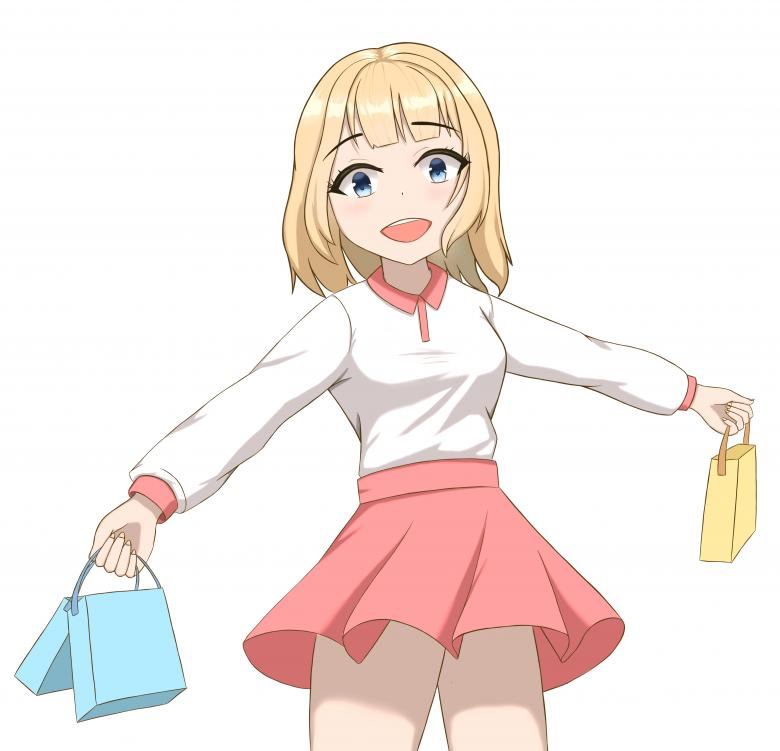

---

**Visualization**

Since we have multiple features, we will use Principal Component Analysis (PCA), a dimension reduction technique that reduces multiple dimensions into a 2D space. We employ PCA because there is no effective method to visualize dimensions higher than three (we have 5 features).

For more information about PCA:

1. https://www.youtube.com/watch?v=5vgP05YpKdE
2. https://www.youtube.com/watch?v=FgakZw6K1QQ

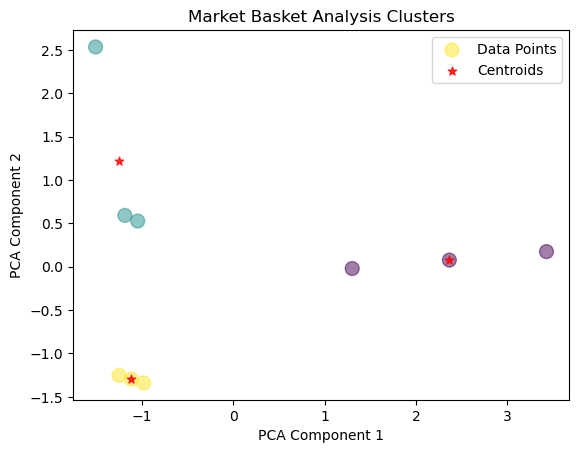

In [16]:
# Use PCA for dimensionality reduction to visualize clusters (optional, for visualization only)
from sklearn.decomposition import PCA

pca = PCA(n_components=5) # We usualy thae the first 2 PCA but I choose 5 for visualiztion in Scree plot
df_pca = pca.fit_transform(df_scaled)

# centroid
centers_pca = pca.transform(km.cluster_centers_)

# Scatter plot of transactions
# usualy we plot the firts 2 PCA (They are rank to hte level of importance)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_pred, s=100, cmap='viridis', alpha=0.50, label='Data Points')

# Plot the cluster centers (centroid)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=40, alpha=0.80, marker='*', label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('Market Basket Analysis Clusters')
plt.show()

We can clearly see that our data points can be grouped into 3 clusters.

In PCA, results are ranked, and we can visualize variance ratios in a Scree plot.

In [17]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([6.13644557e-01, 2.69506535e-01, 8.38503175e-02, 3.29985903e-02,
       1.36955018e-34])

PC1 explains 61% of the data while PC2 explains 26.9%

Text(0, 0.5, 'Percent of Information Explained')

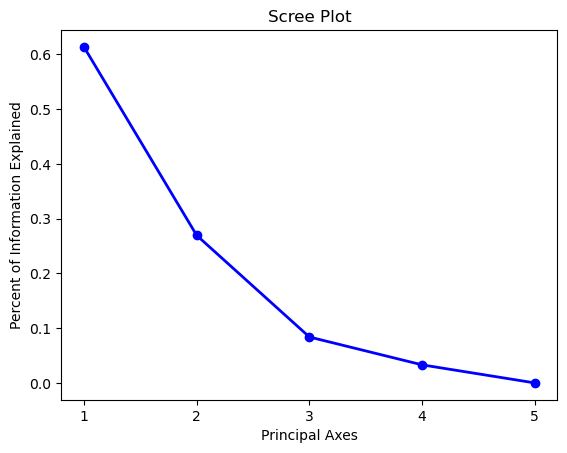

In [18]:
plt.plot(np.arange(1,len(explained_variance_ratio)+1),explained_variance_ratio, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Axes')
plt.xticks(np.arange(1,len(explained_variance_ratio)+1))
plt.ylabel('Percent of Information Explained')

PCA1 explains 61% of our data, and PCA2 explains 27.9%. Together, they account for almost 88% of the variance.

> Note that in PCA, PC1 explains the most variance. Therefore, data points in purple and yellow below are more similar to each other than purple and light blue.

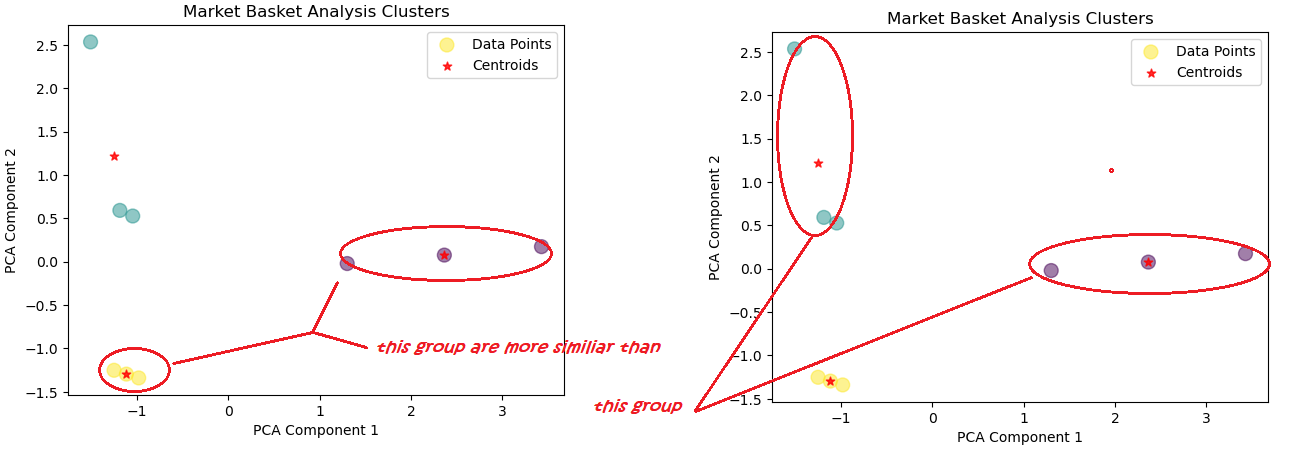

---

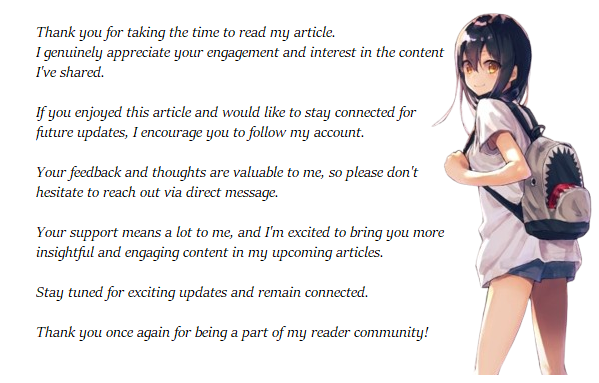

In the meantime, feel free to contact me at mandarioalexis@gmail.com. 

Facebook: https://www.facebook.com/alexis.mandario/ 

LinkedIn: https://www.linkedin.com/in/alyx-mandario-b546881a8/

---